# HR - Analytics Use case

## Data description 

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading csv file

In [5]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [8]:
df.shape

(1470, 35)

# EDA

## Checking null values

In [19]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

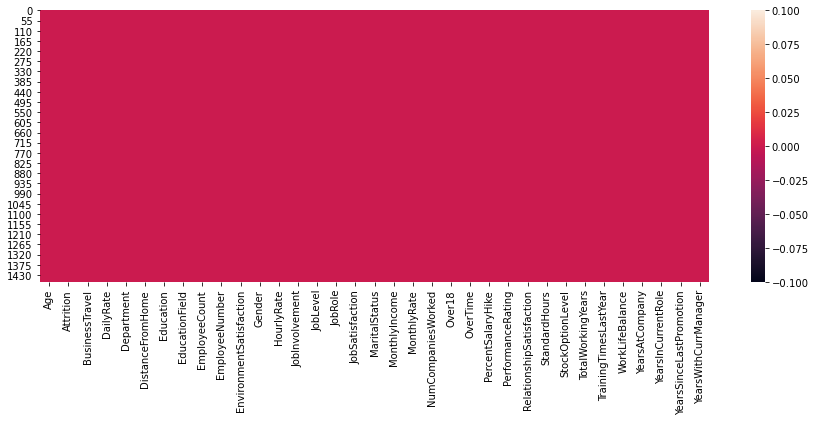

In [13]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull())
plt.show()

## Univariate Analysis

<AxesSubplot:xlabel='Attrition', ylabel='count'>

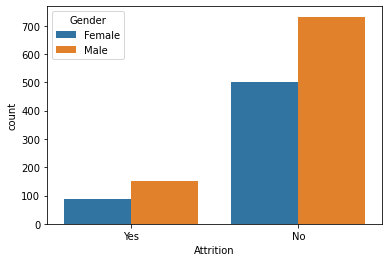

In [16]:
sns.countplot('Attrition', hue='Gender', data=df)

Here we can see the attrition more in male member as compare to female

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


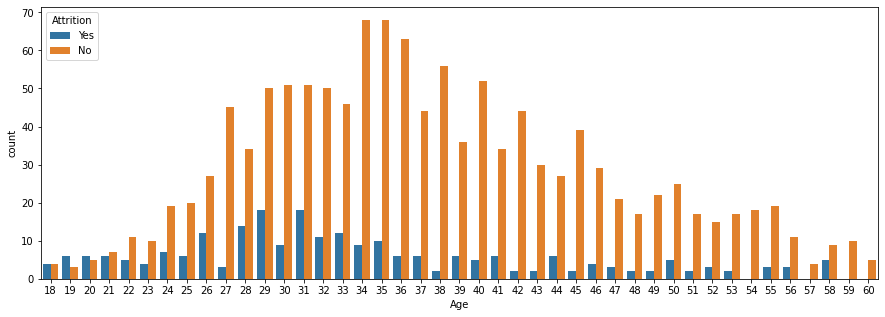

In [18]:
plt.figure(figsize=(15,5))
sns.countplot('Age', hue='Attrition', data=df)
plt.show()

Here we can see the the attrition is very less in the age between 30-40.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

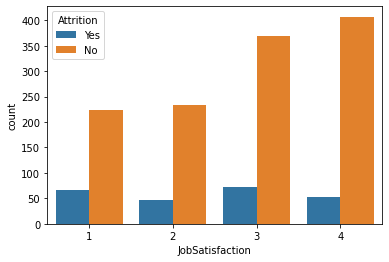

In [21]:
sns.countplot('JobSatisfaction', hue='Attrition', data=df)

It is obvious that the person don't leave their job if they are satisfied with their jobs.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Department', ylabel='count'>

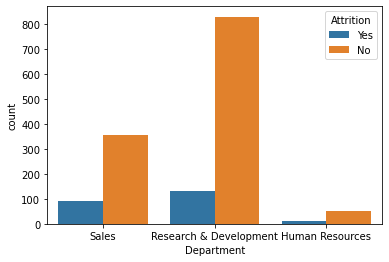

In [23]:
sns.countplot('Department', hue='Attrition', data=df)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

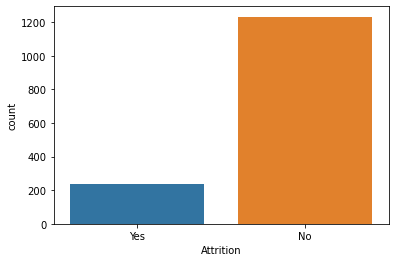

In [27]:
sns.countplot('Attrition', data=df)

We can see that our data is not balanced, we will balance our data in further steps.

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

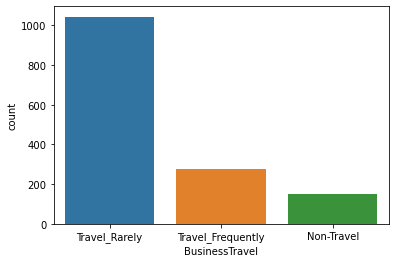

In [28]:
sns.countplot('BusinessTravel', data=df)

<AxesSubplot:xlabel='Department', ylabel='count'>

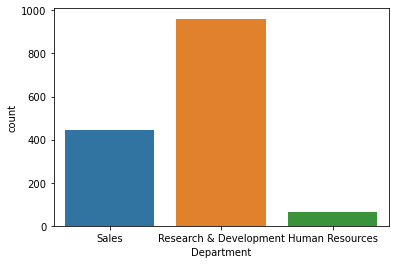

In [29]:
sns.countplot('Department', data=df)

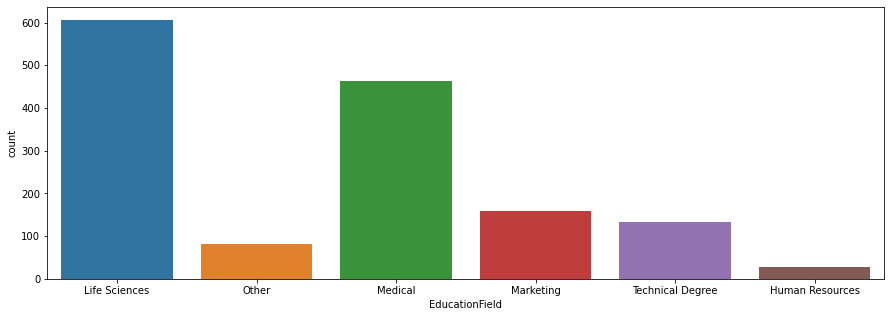

In [32]:
plt.figure(figsize=(15,5))
sns.countplot('EducationField', data=df)
plt.show()

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

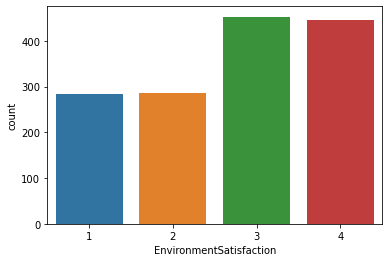

In [35]:
sns.countplot('EnvironmentSatisfaction', data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

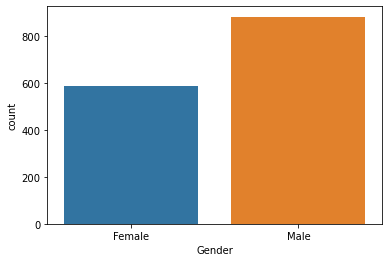

In [36]:
sns.countplot('Gender', data=df)

In [43]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

882 out of 1470 are male employees. 60:40 ratio of male to female employees in the company.

<AxesSubplot:xlabel='count', ylabel='JobRole'>

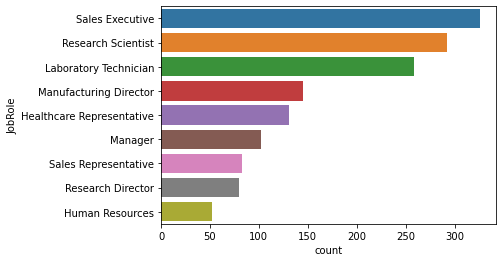

In [41]:
sns.countplot(y='JobRole', data=df)

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

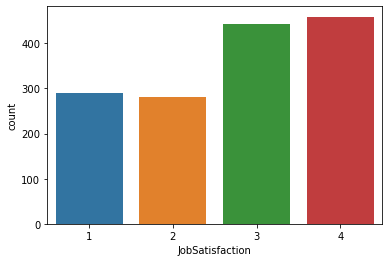

In [39]:
sns.countplot('JobSatisfaction', data=df)

<AxesSubplot:xlabel='count', ylabel='EducationField'>

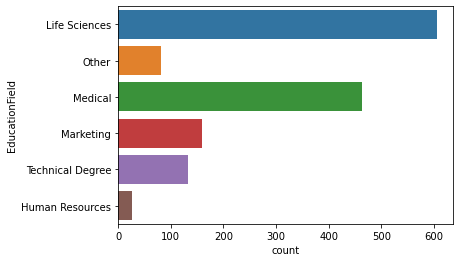

In [42]:
sns.countplot(y='EducationField', data=df)

## Bivariate Analysis 

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

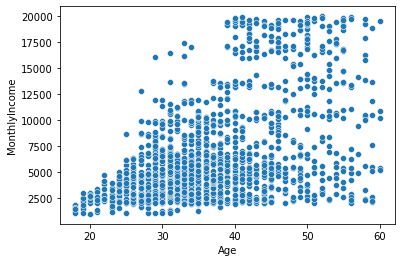

In [44]:
sns.scatterplot(x='Age', y='MonthlyIncome', data=df)

Scatterplot of Age against Monthly Income shows that as the Age increases Monthly Income has also increased. We can also the Monthly Income for different age group.

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

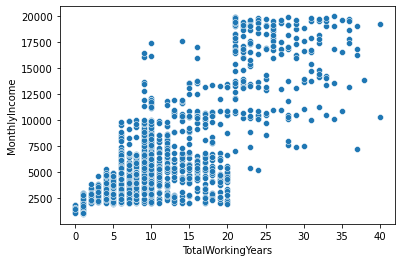

In [45]:
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', data=df)

We can see that the plot on Total Working Years and Monthly Income indicates that most of the employees beyond 20 years of work experience have a salary above 15000.

<AxesSubplot:xlabel='count', ylabel='EducationField'>

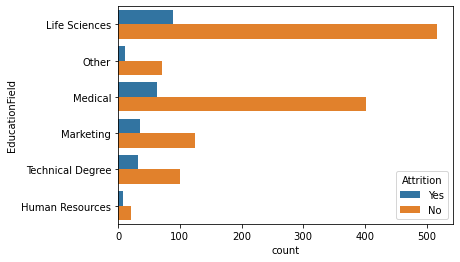

In [50]:
sns.countplot(y='EducationField', hue='Attrition', data=df)

In [48]:
pd.crosstab(df['Attrition'], df['EducationField'])

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Attrition,,,,,,
No,20,517,124,401,71,100
Yes,7,89,35,63,11,32


We can see the count-wise maximum number of attrition observed in employee with ‘Life Sciences’ and 'Medical' education field. However, if we consider each department 26% attrition observed in Human Resources department


In [53]:
pd.crosstab(df['Attrition'], df['JobSatisfaction'])

JobSatisfaction,1,2,3,4
Attrition,,,,
No,223,234,369,407
Yes,66,46,73,52


<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

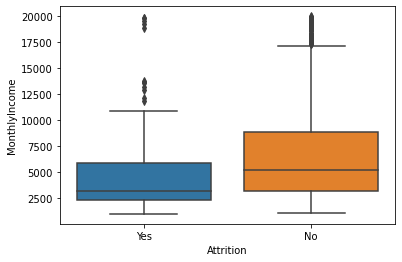

In [57]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)

The average monthly income of attrite employees is much less.

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

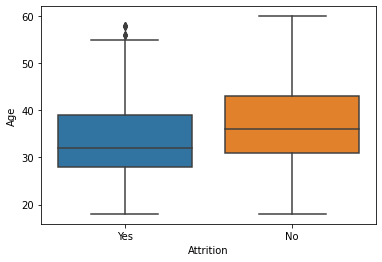

In [59]:
sns.boxplot(x='Attrition', y='Age', data=df)

The attrition is more in the age of 32.

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

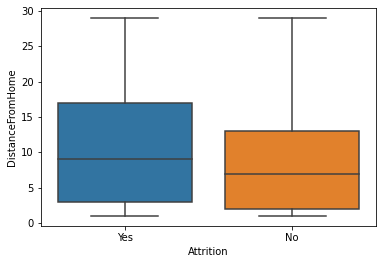

In [60]:
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)

Employees who stay at far away places seem to be leaving the company.

In [85]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Attrition'] = LE.fit_transform(df['Attrition'])

In [88]:
df['Attrition'].unique()

array([1, 0])

### Checking Correlation

In [89]:
corr_mat = df.corr()

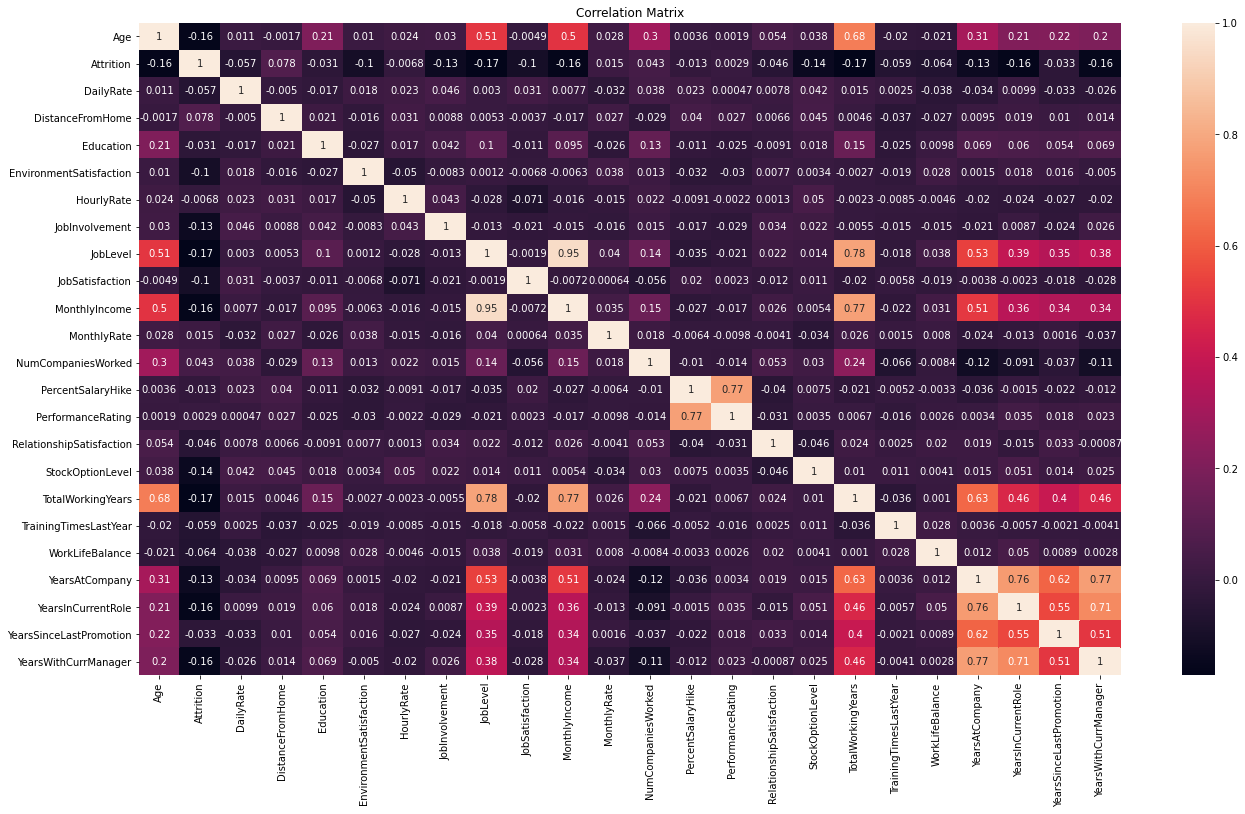

In [90]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix')
plt.show()

Here we can see that Attrition is not correlated with any variable.

### Checking skewness

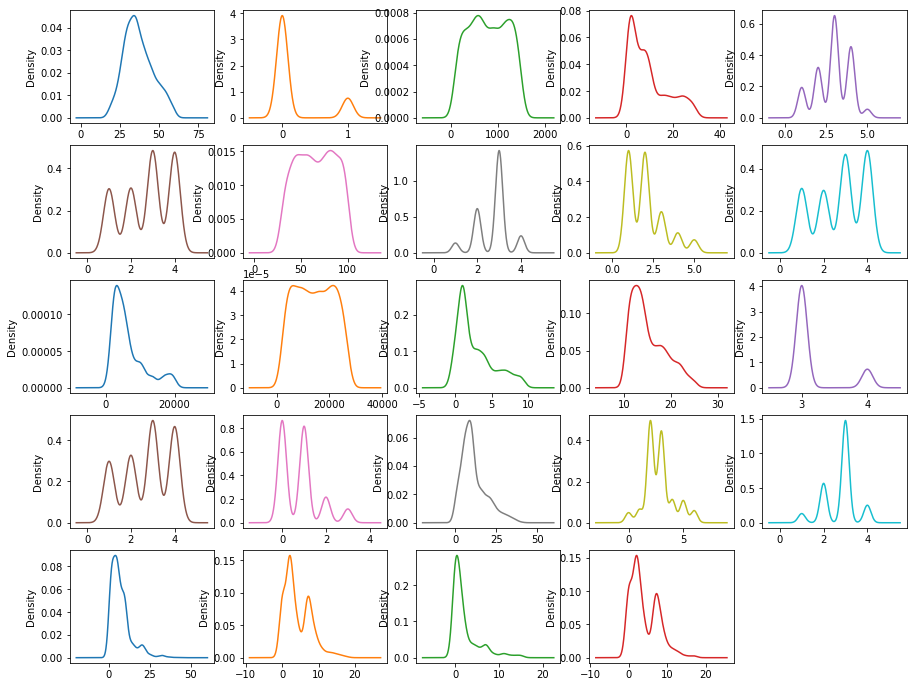

In [93]:
df.plot(kind='density', subplots=True, layout=(5,5), legend=False, sharex=False, figsize=(15,12))
plt.show()

In [94]:
df.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

The skewness value is not greater than -/+3, so it is neglectable.

## Data Cleaning

In the dataset there are 4 irrelevant columns, i.e:EmployeeCount, EmployeeNumber, Over18 and StandardHour. So, we have to remove these for more accuracy.

In [75]:
df[['Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours']].describe(include='all')

,Over18,EmployeeCount,EmployeeNumber,StandardHours
count,1470,1470.0,1470.000000,1470.0
unique,1,NaN,NaN,NaN
top,Y,NaN,NaN,NaN
freq,1470,NaN,NaN,NaN
mean,NaN,1.0,1024.865306,80.0
std,NaN,0.0,602.024335,0.0
min,NaN,1.0,1.000000,80.0
25%,NaN,1.0,491.250000,80.0
50%,NaN,1.0,1020.500000,80.0
75%,NaN,1.0,1555.750000,80.0


In [76]:
df.drop(['Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis=1, inplace=True)

In [77]:
df.shape

(1470, 31)

In [82]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


In [177]:
df[['MaritalStatus', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'OverTime']]

,MaritalStatus,BusinessTravel,Department,EducationField,Gender,JobRole,OverTime
0,Single,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Yes
1,Married,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,No
2,Single,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Yes
3,Married,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Yes
4,Married,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,No
...,...,...,...,...,...,...,...
1465,Married,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,No
1466,Married,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,No
1467,Married,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Yes
1468,Married,Travel_Frequently,Sales,Medical,Male,Sales Executive,No


These are 7 categorical variables apart from dependent variable(Attrition).

In [192]:
MaritalStatus = pd.get_dummies(df['MaritalStatus'])
BusinessTravel = pd.get_dummies(df['BusinessTravel'])
Department = pd.get_dummies(df['Department'])
EducationField = pd.get_dummies(df['EducationField'])
Gender = pd.get_dummies(df['Gender'])
JobRole = pd.get_dummies(df['JobRole'])
OverTime = pd.get_dummies(df['OverTime'])

In [193]:
merged = pd.concat([df, MaritalStatus, BusinessTravel, Department, EducationField, Gender, JobRole, OverTime], axis='columns')

In [206]:
merged.drop(['MaritalStatus', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'OverTime'], axis=1, inplace=True)

In [208]:
df.shape

(1470, 31)

In [209]:
merged.shape

(1470, 52)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

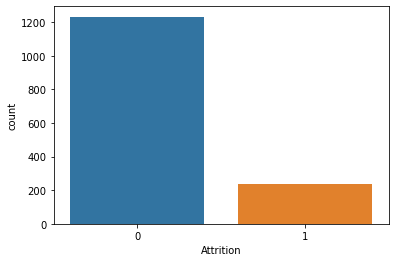

In [196]:
sns.countplot('Attrition', data=merged)

Now we will balance our target variable.

In [210]:
x = merged.drop('Attrition', axis=1)

In [211]:
y = merged['Attrition']

In [225]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

x = np.array(x)
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y.ravel())

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 1233, 1: 237})
Resample dataset shape Counter({1: 1233, 0: 1233})


In [226]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Finding best random state

In [228]:
maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.33, random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ",maxAccu,"on Random State: ",maxRS)

Best accuracy is:  0.7764127764127764 on Random State:  187


We have found best random_state value as 187. We will create our train_test_split using random_state(187)

## Creating train test split

In [229]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=187)

In [230]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('f1_Score:', f1_score(y_test, pred))

Accuracy Score: 0.7513513513513513
[[273  90]
 [ 94 283]]
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       363
           1       0.76      0.75      0.75       377

    accuracy                           0.75       740
   macro avg       0.75      0.75      0.75       740
weighted avg       0.75      0.75      0.75       740

f1_Score: 0.7546666666666666


In [231]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('f1_Score:', f1_score(y_test, pred))

Accuracy Score: 0.7527027027027027
[[238 125]
 [ 58 319]]
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       363
           1       0.72      0.85      0.78       377

    accuracy                           0.75       740
   macro avg       0.76      0.75      0.75       740
weighted avg       0.76      0.75      0.75       740

f1_Score: 0.7771010962241169


In [232]:
svc = SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('f1_Score:', f1_score(y_test, pred))

Accuracy Score: 0.6175675675675676
[[179 184]
 [ 99 278]]
              precision    recall  f1-score   support

           0       0.64      0.49      0.56       363
           1       0.60      0.74      0.66       377

    accuracy                           0.62       740
   macro avg       0.62      0.62      0.61       740
weighted avg       0.62      0.62      0.61       740

f1_Score: 0.6626936829558999


In [233]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred = gnb.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('f1_Score:', f1_score(y_test, pred))

Accuracy Score: 0.8189189189189189
[[264  99]
 [ 35 342]]
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       363
           1       0.78      0.91      0.84       377

    accuracy                           0.82       740
   macro avg       0.83      0.82      0.82       740
weighted avg       0.83      0.82      0.82       740

f1_Score: 0.8361858190709047


## Checking cross validation score

In [234]:
scr = cross_val_score(lr, x, y, cv=5)
print('Cross validation score for Logistic regression:',scr.mean()*100)

Cross validation score for Logistic regression: 84.08163265306122


In [235]:
scr = cross_val_score(knn, x, y, cv=5)
print('Cross validation score for K Nearest Neighbors:', scr.mean()*100)

Cross validation score for K Nearest Neighbors: 82.85714285714286


In [236]:
scr = cross_val_score(svc, x, y, cv=5)
print('Cross validation score for SVC:', scr.mean()*100)

Cross validation score for SVC: 83.87755102040816


In [237]:
scr = cross_val_score(gnb, x, y, cv=5)
print('Cross validation score for GaussianNB:', scr.mean()*100)

Cross validation score for GaussianNB: 77.21088435374149


Here Logistic Regression performs well

## Hyperparameter tuning 

In [240]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
fit_intercept = ['True', 'False']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
multi_class = ['auto', 'ovr', 'multinomial']
C = np.logspace(-5, 8, 15)

params = {'penalty' : penalty,
         'fit_intercept' : fit_intercept,
         'solver' : solver,
         'multi_class' : multi_class,
         'C' : C}

In [241]:
from sklearn.model_selection import GridSearchCV

In [242]:
GCV = GridSearchCV(LogisticRegression(), params, cv=5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'fit_intercept': ['True', 'False'],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [243]:
GCV.best_params_

{'C': 1389495.494373136,
 'fit_intercept': 'True',
 'multi_class': 'ovr',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [245]:
model = LogisticRegression(C=1389495.494373136, fit_intercept='True', multi_class='ovr', penalty='l1', solver='liblinear')
model.fit(x_train, y_train)
modpred = model.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, modpred))
print(confusion_matrix(y_test, modpred))
print(classification_report(y_test, modpred))
print('f1_Score:', f1_score(y_test, modpred)*100)

Accuracy Score: 0.9108108108108108
[[342  21]
 [ 45 332]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       363
           1       0.94      0.88      0.91       377

    accuracy                           0.91       740
   macro avg       0.91      0.91      0.91       740
weighted avg       0.91      0.91      0.91       740

f1_Score: 90.95890410958903


## Plotting ROC AUC curve 

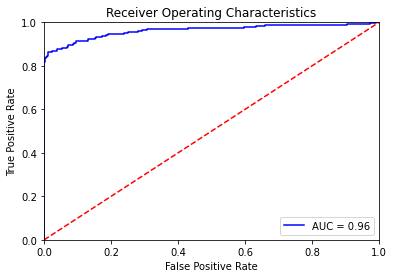

In [259]:
# calculate the fpr and tpr for all thresholds of the classification

probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plotting
plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Checcking how much our predictions are correct

In [246]:
predictions = pd.DataFrame({'Predictions':modpred,'Real Values':y_test})

In [247]:
predictions

,Predictions,Real Values
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
735,0,0
736,1,1
737,1,1
738,0,0


## Saving the model

In [262]:
import joblib
joblib.dump(model, 'HRmodel.pkl')

['HRmodel.pkl']

## Loading the saved model

In [264]:
saved_model = joblib.load('HRmodel.pkl')
prediction = model.predict(x_test)
print(f1_score(y_test, prediction)*100)

90.95890410958903
